<h1 style="color:DodgerBlue;">Customer Churn Service</h1>

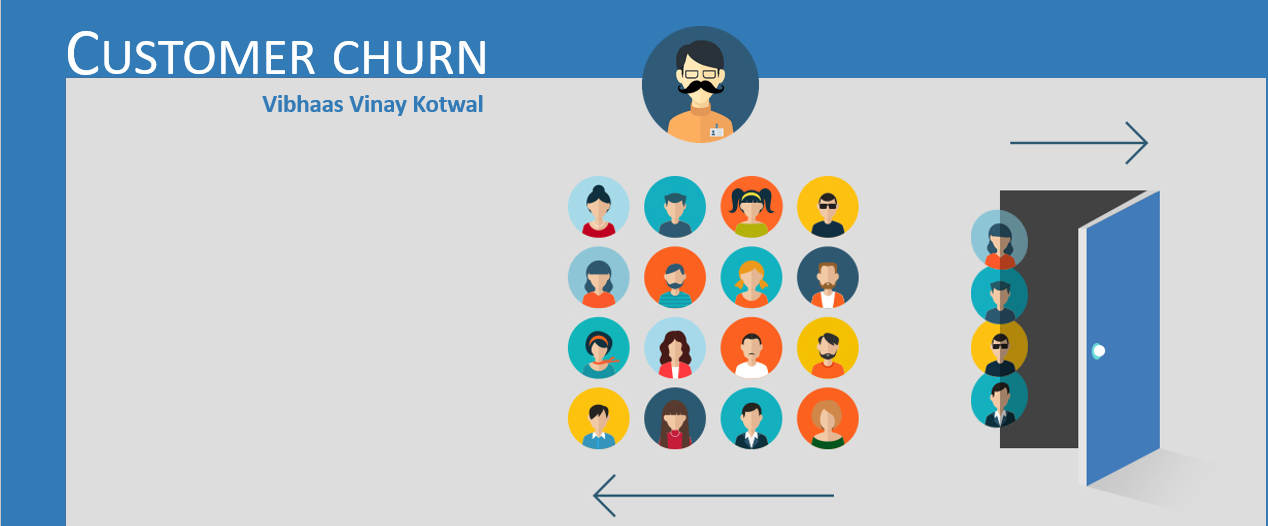

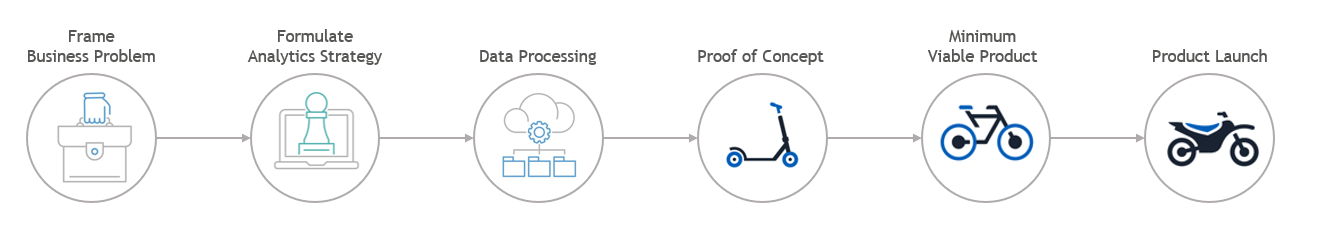

## Solution Statement

- Capability in the hands of Dealership that retains the Customer while enriches Consumer experience.

**Churn** is the process of customer turnover or transition to a less profitable product. With customer churn rates as high as 30 percent per year in some global markets, identifying and retaining at-risk customers remains a top priority for communications executives. Markets are saturated, unhappy customers defect or downsize their service usage, and a class of professional churners is beginning to emerge.

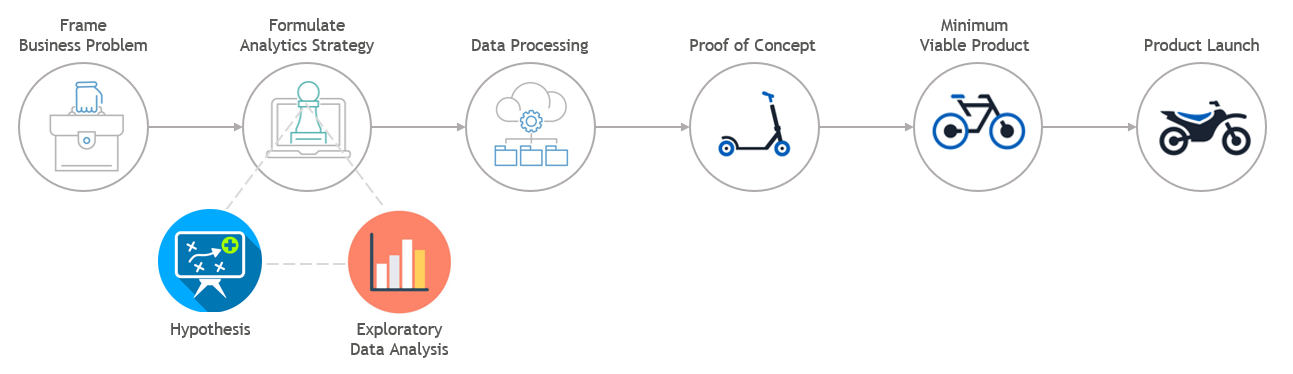

## Approach 

Understand sentiment and pattern of High Risk Customer.
- Analyze structured and unstructured content to predict the likelihood of churn.
- Drive revenue through personalized offers and tailored bundles.


<h1 style="color:DodgerBlue;">Import Libraries</h1>

In [1]:
# Import
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns

import pylab as plot


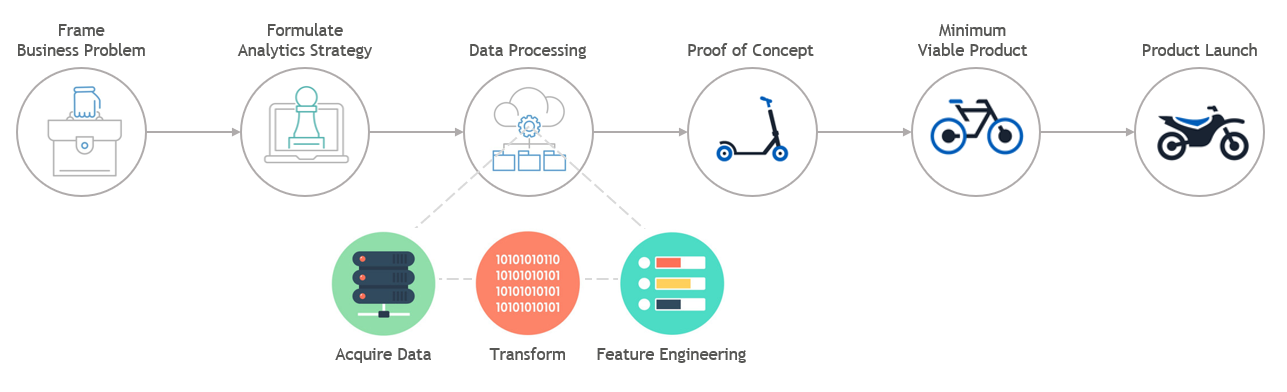

## Data set review & preparation

In this section we will seek to explore the structure of our data:

- To understand the input space the data set 
- Prepare the sets for exploratory

<h1 style="color:DodgerBlue;">Load Data</h1>

In [3]:

# load the dataset

df_basedata_train_0 = pd.read_excel(r'C:\ArtistofAnalytics\Projects\Service_Churn\Customer_Churn_Data_Fetch_3.xlsx')
df_basedata_train_0.head()


,CUSTOMER_ID,TENURE,VISITS,LIFETIME_SPENT,ABSENCE,DRIVE_LIFE,SERVICE_TIME,VEHICLE_AGE,MODEL1,MODEL2,...,Dissatisfied,Satisfied,North,South,East,West,LBR_COST,All_PRTS,Total_Spent,Churn
0,Customer1,43,18,6940.05,15,108885,9.470588,5,0,0,...,0,0,0,1,0,0,356.18,615.19,971.37,0
1,Customer2,0,1,0.00,19,2190,13.000000,1,0,0,...,0,0,1,0,0,0,0.00,0.00,0.00,1
2,Customer3,4,2,188.69,14,10985,15.000000,2,0,0,...,0,0,0,0,0,1,21.54,36.94,58.48,0
3,Customer4,76,22,2824.07,13,122068,17.909091,9,0,1,...,0,0,1,0,0,0,786.68,1956.51,2743.19,0
4,Customer5,39,10,676.35,5,56123,10.600000,6,0,0,...,2,2,0,0,1,0,301.36,386.42,687.78,0


<h1 style="color:DodgerBlue;">Exploratory Data Analysis</h1>

In [4]:
df_basedata_train_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74488 entries, 0 to 74487
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CUSTOMER_ID      74488 non-null  object 
 1   TENURE           74488 non-null  int64  
 2   VISITS           74488 non-null  int64  
 3   LIFETIME_SPENT   74488 non-null  float64
 4   ABSENCE          74488 non-null  int64  
 5   DRIVE_LIFE       74488 non-null  int64  
 6   SERVICE_TIME     74488 non-null  float64
 7   VEHICLE_AGE      74488 non-null  int64  
 8   MODEL1           74488 non-null  int64  
 9   MODEL2           74488 non-null  int64  
 10  MODEL3           74488 non-null  int64  
 11  MODEL4           74488 non-null  int64  
 12  MODEL5           74488 non-null  int64  
 13  MODEL6           74488 non-null  int64  
 14  MODEL7           74488 non-null  int64  
 15  MODEL8           74488 non-null  int64  
 16  MODEL9           74488 non-null  int64  
 17  MODEL10     

In [5]:
df_basedata_train_0.describe()

,TENURE,VISITS,LIFETIME_SPENT,ABSENCE,DRIVE_LIFE,SERVICE_TIME,VEHICLE_AGE,MODEL1,MODEL2,MODEL3,...,Dissatisfied,Satisfied,North,South,East,West,LBR_COST,All_PRTS,Total_Spent,Churn
count,74488.000000,74488.000000,74488.000000,74488.000000,74488.00000,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000,...,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000,74488.000000
mean,29.891607,7.496563,1015.909142,11.883337,48024.50592,26.044397,4.386720,0.130008,0.004430,0.011801,...,0.422833,0.724587,0.548303,0.244549,0.066521,0.140627,243.167778,470.548863,713.716641,0.260955
std,25.568569,7.016909,1891.727409,10.314209,47348.28230,21.802303,3.053363,0.336314,0.066413,0.107988,...,0.838243,1.165042,0.497665,0.429823,0.249192,0.347638,343.093383,829.669711,1103.674212,0.439158
min,0.000000,1.000000,-2122.970000,0.000000,0.00000,-3.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-484.020000,0.000000,-484.020000,0.000000
25%,5.000000,2.000000,101.110000,3.000000,15177.00000,12.625000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.540000,45.680000,88.847500,0.000000
50%,26.000000,5.000000,372.695000,8.000000,38694.50000,19.285714,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,121.150000,185.280000,324.985000,0.000000
75%,51.000000,10.000000,1064.182500,19.000000,69339.25000,34.000000,6.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,320.182500,564.455000,900.942500,1.000000
max,89.000000,105.000000,31942.540000,36.000000,999999.00000,164.000000,19.000000,1.000000,1.000000,1.000000,...,17.000000,21.000000,1.000000,1.000000,1.000000,1.000000,6648.970000,29160.800000,32040.190000,1.000000


Text(0.5, 1.0, 'df_basedata_train_0')

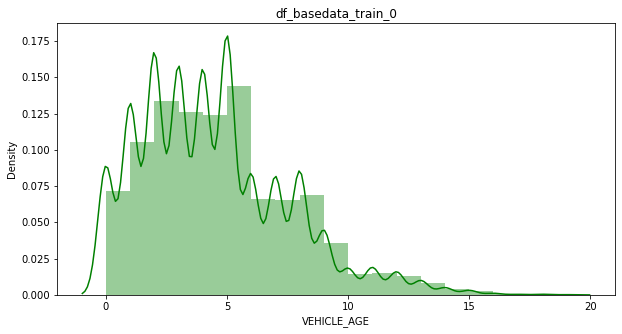

In [6]:
plt.figure(figsize=(10,5))
sns.distplot(df_basedata_train_0['VEHICLE_AGE'], bins=19, color='g').set_title('df_basedata_train_0')

In [7]:
df_basedata_train_0[df_basedata_train_0['DRIVE_LIFE']>900000].head()

,CUSTOMER_ID,TENURE,VISITS,LIFETIME_SPENT,ABSENCE,DRIVE_LIFE,SERVICE_TIME,VEHICLE_AGE,MODEL1,MODEL2,...,Dissatisfied,Satisfied,North,South,East,West,LBR_COST,All_PRTS,Total_Spent,Churn
12975,Customer12976,3,2,147.79,8,900175,12.000000,5,0,0,...,0,0,0,1,0,0,11.73,136.06,147.79,0
19623,Customer19624,80,22,5226.88,8,901089,22.000000,11,0,0,...,0,3,1,0,0,0,1163.17,4051.86,5215.03,0
34013,Customer34014,66,16,2217.41,17,996108,14.769231,13,0,0,...,0,1,1,0,0,0,461.93,1775.59,2237.52,0
36393,Customer36394,85,27,2724.39,4,933940,21.909091,7,0,0,...,1,3,1,0,0,0,776.37,1966.79,2743.16,0
37512,Customer37513,30,16,1614.09,29,992987,20.000000,9,0,0,...,0,0,1,0,0,0,596.12,1019.38,1615.50,1


In [8]:
# data size
print("Train Data Size: ", df_basedata_train_0.shape)

Train Data Size:  (74488, 33)


The df has **74488 Observations with 33 Features**. We review this further to identify what attributes will be necessary and what data manipulation needs to be carried out before Exploratory analysis and prediction modelling

In [9]:
# Show if any NAN data
df_basedata_train_0.isnull().sum()

CUSTOMER_ID        0
TENURE             0
VISITS             0
LIFETIME_SPENT     0
ABSENCE            0
DRIVE_LIFE         0
SERVICE_TIME       0
VEHICLE_AGE        0
MODEL1             0
MODEL2             0
MODEL3             0
MODEL4             0
MODEL5             0
MODEL6             0
MODEL7             0
MODEL8             0
MODEL9             0
MODEL10            0
MODEL11            0
FUEL_TYPE          0
USED_VEH           0
ESB_ACTIVE         0
Latest_Feedback    0
Dissatisfied       0
Satisfied          0
North              0
South              0
East               0
West               0
LBR_COST           0
All_PRTS           0
Total_Spent        0
Churn              0
dtype: int64

Great; no missing values!

In [44]:
# Get unique count for each variable
df_basedata_train_0.nunique()

CUSTOMER_ID        74488
TENURE                90
VISITS                76
LIFETIME_SPENT     54563
ABSENCE               37
DRIVE_LIFE         51981
SERVICE_TIME        7395
VEHICLE_AGE           20
MODEL1                 2
MODEL2                 2
MODEL3                 2
MODEL4                 2
MODEL5                 2
MODEL6                 2
MODEL7                 2
MODEL8                 2
MODEL9                 2
MODEL10                2
MODEL11                2
FUEL_TYPE              2
USED_VEH               2
ESB_ACTIVE             2
Latest_Feedback        3
Dissatisfied          17
Satisfied             19
North                  2
South                  2
East                   2
West                   2
LBR_COST           38523
All_PRTS           45493
Total_Spent        55457
Churn                  2
dtype: int64

In [10]:
df_basedata_train_1 = df_basedata_train_0.copy()

In [11]:
df_basedata_train_1.drop(['CUSTOMER_ID'], axis=1, inplace=True)

In [12]:
df_basedata_train_1.head()

,TENURE,VISITS,LIFETIME_SPENT,ABSENCE,DRIVE_LIFE,SERVICE_TIME,VEHICLE_AGE,MODEL1,MODEL2,MODEL3,...,Dissatisfied,Satisfied,North,South,East,West,LBR_COST,All_PRTS,Total_Spent,Churn
0,43,18,6940.05,15,108885,9.470588,5,0,0,0,...,0,0,0,1,0,0,356.18,615.19,971.37,0
1,0,1,0.00,19,2190,13.000000,1,0,0,0,...,0,0,1,0,0,0,0.00,0.00,0.00,1
2,4,2,188.69,14,10985,15.000000,2,0,0,0,...,0,0,0,0,0,1,21.54,36.94,58.48,0
3,76,22,2824.07,13,122068,17.909091,9,0,1,0,...,0,0,1,0,0,0,786.68,1956.51,2743.19,0
4,39,10,676.35,5,56123,10.600000,6,0,0,0,...,2,2,0,0,1,0,301.36,386.42,687.78,0


In [13]:
df_basedata_train_1.shape

(74488, 32)

In [14]:
type(df_basedata_train_1)

pandas.core.frame.DataFrame

<AxesSubplot:>

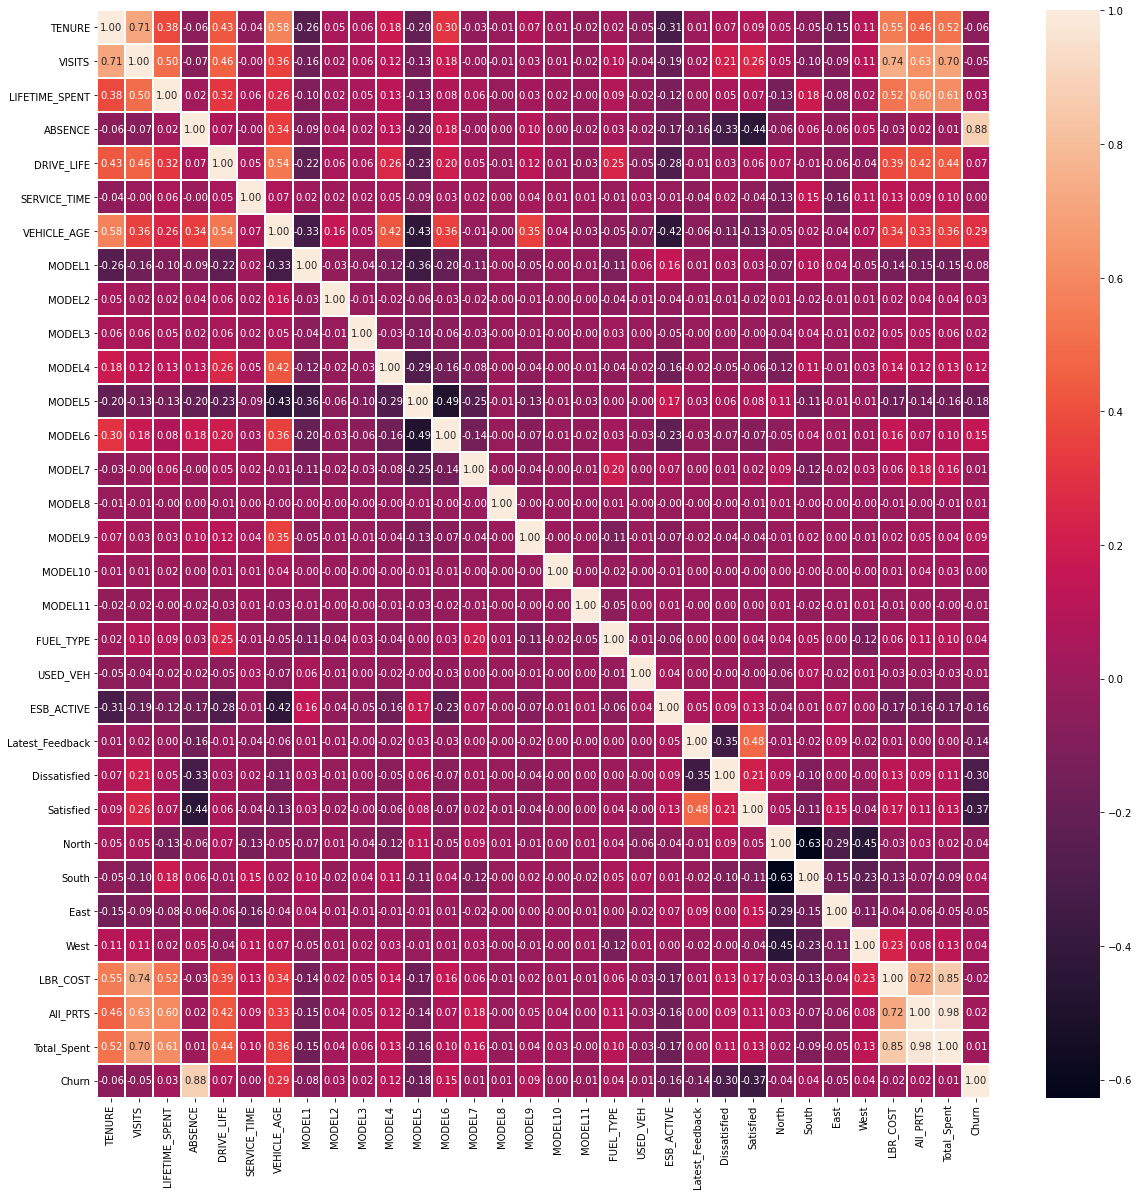

In [15]:

f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_basedata_train_1.corr(), annot=True, linewidths=1, fmt='.2f',ax=ax)
#ax.set_ylim(10, 0)

In [16]:
modeling_data = df_basedata_train_1.iloc[:60000]
validate_data = df_basedata_train_1.iloc[60000:]

In [17]:
modeling_data.head()

,TENURE,VISITS,LIFETIME_SPENT,ABSENCE,DRIVE_LIFE,SERVICE_TIME,VEHICLE_AGE,MODEL1,MODEL2,MODEL3,...,Dissatisfied,Satisfied,North,South,East,West,LBR_COST,All_PRTS,Total_Spent,Churn
0,43,18,6940.05,15,108885,9.470588,5,0,0,0,...,0,0,0,1,0,0,356.18,615.19,971.37,0
1,0,1,0.00,19,2190,13.000000,1,0,0,0,...,0,0,1,0,0,0,0.00,0.00,0.00,1
2,4,2,188.69,14,10985,15.000000,2,0,0,0,...,0,0,0,0,0,1,21.54,36.94,58.48,0
3,76,22,2824.07,13,122068,17.909091,9,0,1,0,...,0,0,1,0,0,0,786.68,1956.51,2743.19,0
4,39,10,676.35,5,56123,10.600000,6,0,0,0,...,2,2,0,0,1,0,301.36,386.42,687.78,0


In [18]:
modeling_data.shape

(60000, 32)

In [19]:
validate_data.shape

(14488, 32)

In [20]:
type(modeling_data)

pandas.core.frame.DataFrame

<h1 style="color:DodgerBlue;">Data Preparation</h1>

In [21]:
# Machine Learning 

X = modeling_data.drop("Churn", axis=1)
y = modeling_data["Churn"]

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score


In [23]:
# Split data to 80% training data and 20% of test to check the accuracy of our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [24]:
#modeling_data

# Machine Learning 
FI_predictor = modeling_data.drop(['Churn'], 1)
FI_target = modeling_data['Churn']

In [25]:
FI_predictor.head()

,TENURE,VISITS,LIFETIME_SPENT,ABSENCE,DRIVE_LIFE,SERVICE_TIME,VEHICLE_AGE,MODEL1,MODEL2,MODEL3,...,Latest_Feedback,Dissatisfied,Satisfied,North,South,East,West,LBR_COST,All_PRTS,Total_Spent
0,43,18,6940.05,15,108885,9.470588,5,0,0,0,...,0,0,0,0,1,0,0,356.18,615.19,971.37
1,0,1,0.00,19,2190,13.000000,1,0,0,0,...,0,0,0,1,0,0,0,0.00,0.00,0.00
2,4,2,188.69,14,10985,15.000000,2,0,0,0,...,0,0,0,0,0,0,1,21.54,36.94,58.48
3,76,22,2824.07,13,122068,17.909091,9,0,1,0,...,0,0,0,1,0,0,0,786.68,1956.51,2743.19
4,39,10,676.35,5,56123,10.600000,6,0,0,0,...,1,2,2,0,0,1,0,301.36,386.42,687.78


<AxesSubplot:ylabel='feature'>

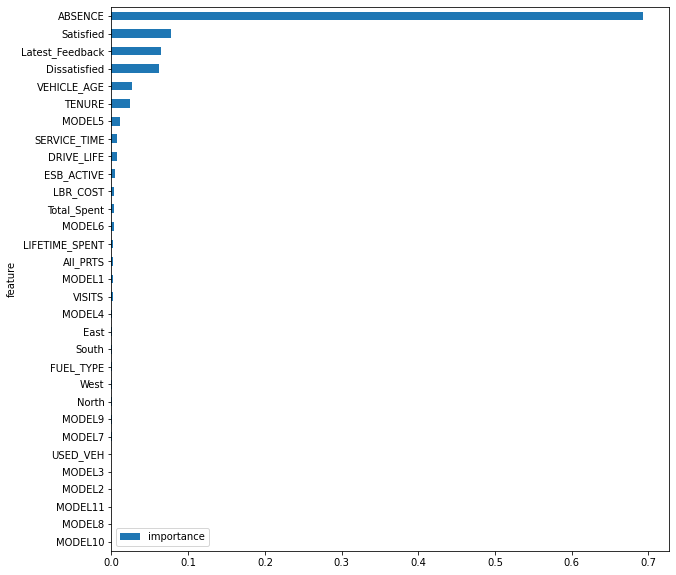

In [26]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(FI_predictor, FI_target)

#have a look at the importance of each feature.
features = pd.DataFrame()
features['feature'] = FI_predictor.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(10, 10))

In [27]:
modeling_data_2 = modeling_data.copy()

In [28]:
modeling_data_2.head()

,TENURE,VISITS,LIFETIME_SPENT,ABSENCE,DRIVE_LIFE,SERVICE_TIME,VEHICLE_AGE,MODEL1,MODEL2,MODEL3,...,Dissatisfied,Satisfied,North,South,East,West,LBR_COST,All_PRTS,Total_Spent,Churn
0,43,18,6940.05,15,108885,9.470588,5,0,0,0,...,0,0,0,1,0,0,356.18,615.19,971.37,0
1,0,1,0.00,19,2190,13.000000,1,0,0,0,...,0,0,1,0,0,0,0.00,0.00,0.00,1
2,4,2,188.69,14,10985,15.000000,2,0,0,0,...,0,0,0,0,0,1,21.54,36.94,58.48,0
3,76,22,2824.07,13,122068,17.909091,9,0,1,0,...,0,0,1,0,0,0,786.68,1956.51,2743.19,0
4,39,10,676.35,5,56123,10.600000,6,0,0,0,...,2,2,0,0,1,0,301.36,386.42,687.78,0


In [29]:
modeling_data_2.drop(['ABSENCE'], axis=1, inplace=True)

In [30]:
modeling_data_2.head()

,TENURE,VISITS,LIFETIME_SPENT,DRIVE_LIFE,SERVICE_TIME,VEHICLE_AGE,MODEL1,MODEL2,MODEL3,MODEL4,...,Dissatisfied,Satisfied,North,South,East,West,LBR_COST,All_PRTS,Total_Spent,Churn
0,43,18,6940.05,108885,9.470588,5,0,0,0,0,...,0,0,0,1,0,0,356.18,615.19,971.37,0
1,0,1,0.00,2190,13.000000,1,0,0,0,0,...,0,0,1,0,0,0,0.00,0.00,0.00,1
2,4,2,188.69,10985,15.000000,2,0,0,0,0,...,0,0,0,0,0,1,21.54,36.94,58.48,0
3,76,22,2824.07,122068,17.909091,9,0,1,0,0,...,0,0,1,0,0,0,786.68,1956.51,2743.19,0
4,39,10,676.35,56123,10.600000,6,0,0,0,0,...,2,2,0,0,1,0,301.36,386.42,687.78,0


In [31]:
#modeling_data

# Machine Learning 
predictor2 = modeling_data_2.drop(['Churn'], 1)
target2 = modeling_data_2['Churn']

<AxesSubplot:ylabel='feature'>

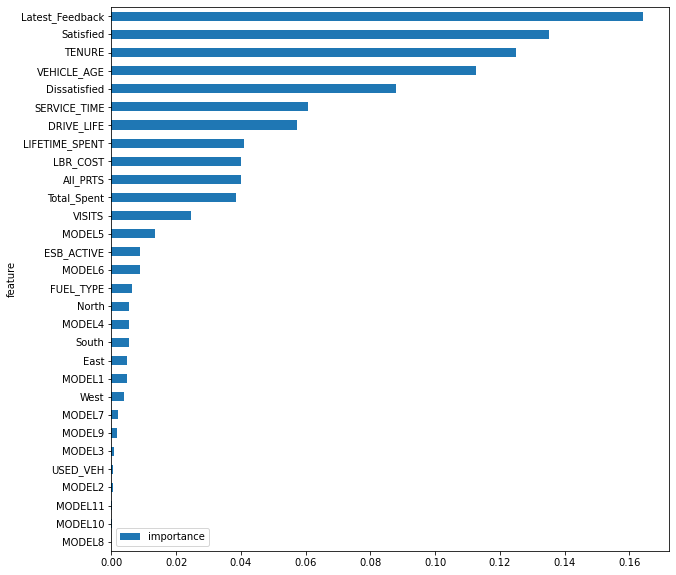

In [32]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(predictor2, target2)

#have a look at the importance of each feature.
features = pd.DataFrame()
features['feature'] = predictor2.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(10, 10))

<h1 style="color:DodgerBlue;">Model Preparation</h1>

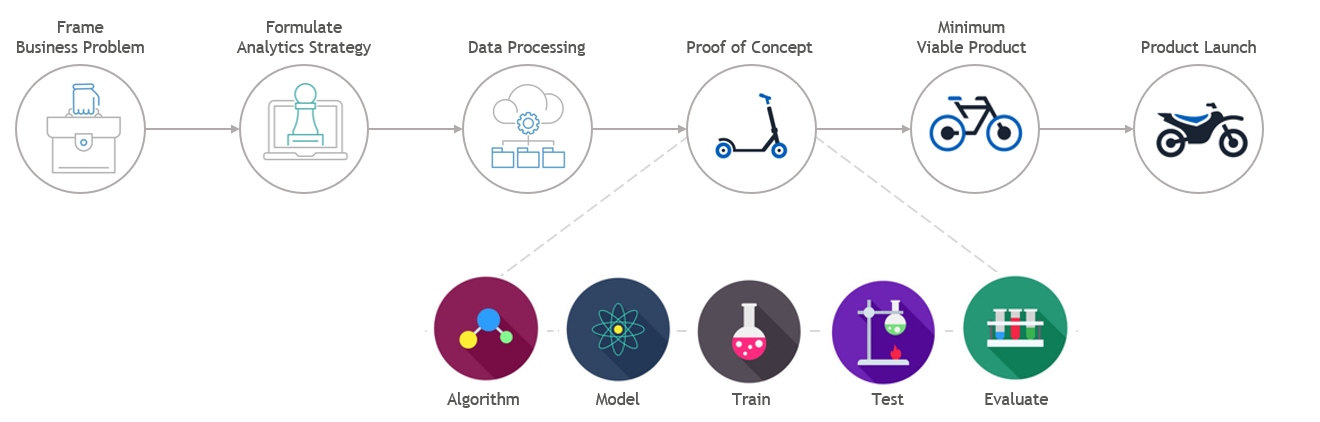

<h1 style="color:DodgerBlue;">Create Base Model</h1>

- GradientBoostingClassifier
- LogisticRegression
- Naive Bayes

In [33]:

# No Normalization

# Split data to 80% training data and 20% of test to check the accuracy of our model
X_train, X_test, y_train, y_test = train_test_split(predictor2, target2, test_size=0.25, random_state=0)


#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("GB Accuracy:",metrics.accuracy_score(y_test, y_pred))


## Lets call logistic regression
#Model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print ("Logistic Regression Accuracy: {}".format(round(accuracy_score(y_test,y_pred),4)))


from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
naivebayespred = gnb.predict(X_test)
print ("Naive Bayes Accuracy: {}".format(round(accuracy_score(y_test,naivebayespred),8)))


GB Accuracy: 0.9270666666666667
Logistic Regression Accuracy: 0.7427
Naive Bayes Accuracy: 0.7628


<h1 style="color:DodgerBlue;">Create Advance Models</h1>

- Logistic Regression
- Gradient Boosting
- Decision Tree
- K Nearest Neighbour
- Support Vector Machine
- Naive Bayes
- Random Forest
- Extreme Gradient Boosting

[11:18:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:18:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    Algo  Accuracy  execution_time
0    KNN    0.6980            1.92
1     LR    0.7369            0.28
2    SVC    0.7376           48.70
3     NB    0.7542            0.07
4  Dtree    0.9038            0.32
5     RF    0.9248            4.67
6    XGB    0.9312            2.09


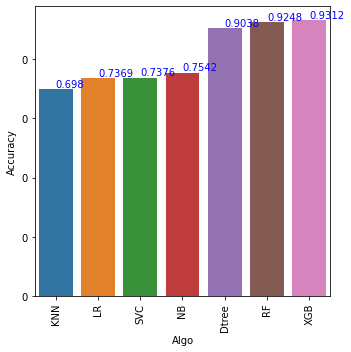

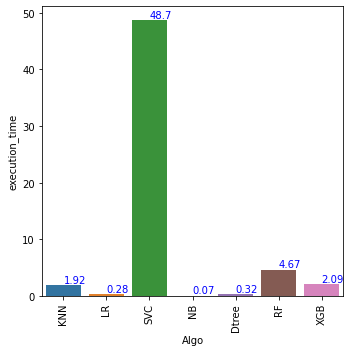

[11:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:19:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    Algo      f1  execution_time
0    SVC  0.0002           48.20
1     LR  0.1660            0.29
2    KNN  0.2315            1.99
3     NB  0.4336            0.07
4  Dtree  0.8145            0.32
5     RF  0.8648            4.63
6    XGB  0.8731            2.14
[11:20:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XG

In [43]:
# Split data to 80% training data and 20% of test to check the accuracy of our model
X_train, X_test, y_train, y_test = train_test_split(predictor2, target2, test_size=0.20, random_state=0)


from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import time

#create an array of models
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeClassifier()))
models.append(("XGB",xgb.XGBClassifier()))
models.append(("KNN",KNeighborsClassifier()))

result = []
#measure the accuracy 
for name,model in models:
    start_time = time.time()
    kfold = KFold(n_splits=2, random_state=22)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    execution_time = (time.time() - start_time)
    result.append((name,round(cv_result.mean(),4), round(execution_time,2) ))
    

pd.DataFrame(result)
    
dfa = pd.DataFrame(result, columns =['Algo', 'Accuracy', 'execution_time']) 
dfa 

# sort df by Count column
pd_df = dfa.sort_values(['Accuracy']).reset_index(drop=True)
print (pd_df)


plt.figure(figsize=(5,5))
# plot bar chart with index as x values
ax = sns.barplot(pd_df.index, pd_df.Accuracy)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Algo", ylabel="Accuracy")
# add proper Dim values as x labels

ax.set_xticklabels(pd_df.Algo)
for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(pd_df["Accuracy"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='b', va ='bottom', rotation=0)
plt.tight_layout()
plt.show()


plt.figure(figsize=(5,5))
# plot bar chart with index as x values
ax = sns.barplot(pd_df.index, pd_df.execution_time)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Algo", ylabel="execution_time")
# add proper Dim values as x labels

ax.set_xticklabels(pd_df.Algo)
for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(pd_df["execution_time"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='b', va ='bottom', rotation=0)
plt.tight_layout()
plt.show()




#create an array of models
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeClassifier()))
models.append(("XGB",xgb.XGBClassifier()))
models.append(("KNN",KNeighborsClassifier()))

result = []
#measure the accuracy 
for name,model in models:
    start_time = time.time()
    kfold = KFold(n_splits=2, random_state=22)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "f1")
    execution_time = (time.time() - start_time)
    result.append((name,round(cv_result.mean(),4), round(execution_time,2) ))
    
pd.DataFrame(result)
    
dff = pd.DataFrame(result, columns =['Algo', 'f1', 'execution_time']) 
dff 

# sort df by Count column
pd_df_f = dff.sort_values(['f1']).reset_index(drop=True)
print (pd_df_f)



#create an array of models
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeClassifier()))
models.append(("XGB",xgb.XGBClassifier()))
models.append(("KNN",KNeighborsClassifier()))

result = []
#measure the accuracy 
for name,model in models:
    start_time = time.time()
    kfold = KFold(n_splits=2, random_state=22)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "roc_auc")
    execution_time = (time.time() - start_time)
    result.append((name,round(cv_result.mean(),4), round(execution_time,2) ))
    

pd.DataFrame(result)
    
dfr = pd.DataFrame(result, columns =['Algo', 'roc_auc', 'execution_time']) 
dfr 

# sort df by Count column
pd_df_r = dfr.sort_values(['roc_auc']).reset_index(drop=True)
print (pd_df_r)



# Merge 
pd_df1 = pd_df.copy()
pd_df1.drop(['execution_time'], axis=1, inplace=True)

pd_df_f1 = pd_df_f.copy()
pd_df_f1.drop(['execution_time'], axis=1, inplace=True)

pd_df_r1 = pd_df_r.copy()
pd_df_r1.drop(['execution_time'], axis=1, inplace=True)


result1_pp = pd.merge(pd_df1, pd_df_f1, left_on=['Algo'], right_on=['Algo'], how='left')
result2_pp = pd.merge(result1_pp, pd_df_r1, left_on=['Algo'], right_on=['Algo'], how='left')

result2_pp


# Rename 
pd_df1.rename(columns={"Accuracy": "Performance"}, inplace = True)
pd_df_f1.rename(columns={"f1": "Performance"}, inplace = True)
pd_df_r1.rename(columns={"roc_auc": "Performance"}, inplace = True)

pd_df1['metric'] = 'Accuracy'
pd_df_f1['metric'] = 'F1'
pd_df_r1['metric'] = 'ROC'

df_performance1 = pd_df1

df_performance2 = df_performance1.append(pd_df_f1)

df_performance = df_performance2.append(pd_df_r1)
df_performance
df_performance = df_performance.sort_values(["Algo","metric"], ascending = (True, True))


import plotly.express as px

df = df_performance
fig = px.line(df, x="Algo", y="Performance", color = 'metric')

fig.show()

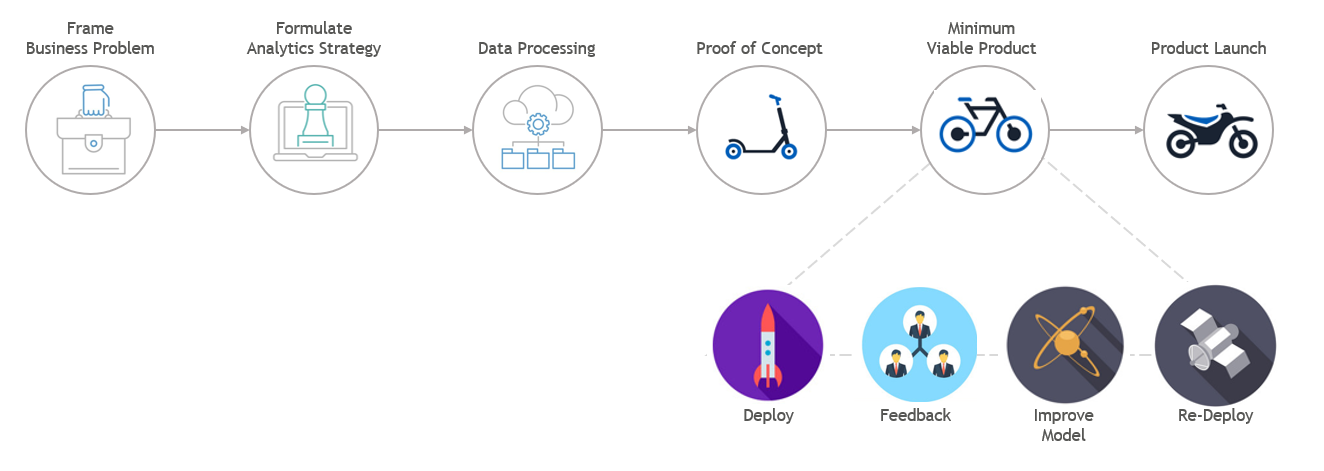

<h1 style="color:DodgerBlue;">Hyper Parameter Optimization</h1>

In [36]:
# Data Handling
from pandas import read_csv
import os
import pandas as pd
import numpy as np
import time

# Modeling
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

# Visualization
import matplotlib
from matplotlib import pyplot

## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV



In [38]:

from sklearn.model_selection import train_test_split, cross_val_score


# Split data to 80% training data and 20% of test to check the accuracy of our model
X_train, X_test, y_train, y_test = train_test_split(predictor2, target2, test_size=0.20, random_state=0)


In [39]:
## Hyper Parameter Optimization
n_estimators = range(100, 1600, 100)
max_depth = range(3, 21, 1)
learning_rate = [0.01, 0.03, 0.05, 0.10, 0.15, 0.20, 0.25, 0.3] 
gamma = [ 0.0, 0.1,  0.4,   0.9, 1 , 2, 5 , 10, 15, 20 ]

min_child_weight = range(1, 21, 1)
subsample = [0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0 ]
colsample_bytree = [ 0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0  ]

reg_lambda = [1e-5,1e-4,1e-3, 1e-2, 0.1, 1,10, 100]
reg_alpha = [1e-5,1e-4,1e-3, 1e-2, 0.1, 1,10, 100]

scale_pos_weight = [1e-5,1e-4,1e-3, 1e-2, 0.1, 1,10, 100]

max_delta_step  = range(0, 21, 1)

In [40]:
# Modeling
import xgboost
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# Create Model Object
classifier=xgboost.XGBClassifier()

# Initiate start time
start_time = time.time()

# Parameters
params = dict(learning_rate = learning_rate, max_depth = max_depth, min_child_weight = min_child_weight, gamma = gamma, colsample_bytree = colsample_bytree, n_estimators = n_estimators, subsample=subsample )

# Check Best parameters
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=1)
random_result = random_search.fit(X_train,y_train)

# Check Execution time
end_time = time.time()
execution_time = (end_time - start_time)
print("Successfully executed in", round(execution_time/60,1), "mins")


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.1min finished


[10:44:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Successfully executed in 4.5 mins


In [41]:
random_result.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=10, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=15,
              min_child_weight=13, missing=nan, monotone_constraints='()',
              n_estimators=900, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=10, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=15,
              min_child_weight=13, monotone_constraints='()',
              n_estimators=900, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

from sklearn.model_selection import cross_val_score
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

recall = cross_val_score(classifier, X_train, y_train, cv=5, scoring='recall')
print('Recall', np.mean(recall), recall)
precision = cross_val_score(classifier, X_train, y_train, cv=5, scoring='precision')
print('Precision', np.mean(precision), precision)
f1 = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1')
print('F1', np.mean(f1), f1)

[10:47:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:47:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:48:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:48:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

<h1 style="color:DodgerBlue;">Conclusion</h1>

<strong style="color:Tomato;"> Recall 91.4 % </strong>    

<strong style="color:Tomato;"> Precision 84.59 % </strong>  

<strong style="color:Tomato;"> F1 87.86 %</strong>    

